# Convolutional NN

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers.noise import GaussianDropout
from keras.layers import Flatten, AveragePooling2D, UpSampling2D
from keras import *
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

Load MCMC data

In [66]:
loaded = np.load('/home/alvin/Desktop/2d_ising_nn/data/data.npz')
inputs = loaded['a']
results = loaded['b']
temp = loaded['c']
magnetization = loaded['d']
num_samples = len(inputs)
input_samples = int(0.9*num_samples)
valid_samples = int(0.1*num_samples)

Split training and validation data

In [67]:
training_inputs = np.copy(inputs[:input_samples])
l = int( np.sqrt(training_inputs.shape[1]) )
training_inputs = training_inputs.reshape((input_samples,l,l,1)) #extra 1 for channel
    
training_results = np.copy(results[:input_samples])
training_temp = np.copy(temp[:input_samples])

valid_inputs = np.copy(inputs[input_samples:])
valid_inputs = valid_inputs.reshape((valid_samples,l,l,1)) #extra 1 for channel
valid_results = np.copy(results[input_samples:])
valid_temp = np.copy(temp[input_samples:])

In [68]:
net = Sequential()
net.add(Conv2D(10,(2,2),activation='relu',input_shape=(l,l,1)))
net.add(AveragePooling2D(pool_size=2))
net.add(Flatten())
net.add(Dense(64, activation='relu'))
net.add(Dense(2, activation='softmax'))
net.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.02), metrics=['categorical_accuracy'])

In [69]:
# epochs = 100
# cost = np.zeros(epochs)
# for i in range(epochs):
#     cost[i] = net.train_on_batch(training_data,training_results)[0]

In [70]:
history=net.fit(training_inputs,training_results,batch_size=100,
                epochs=200,validation_split=0,verbose =0)

## Plot accuracy

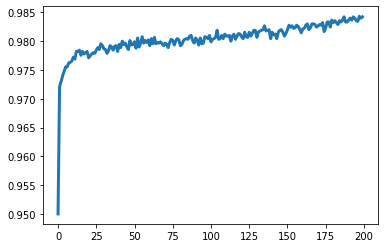

In [71]:
fig=plt.figure()
plt.plot(history.history['categorical_accuracy'], linewidth=3)
#plt.plot(history.history['val_categorical_accuracy'], linewidth=3)
plt.show()

Run the network on validation set and see how it performs

In [72]:
get_layer_output = K.function(inputs = net.layers[0].input, outputs = net.layers[-1].output)
output = get_layer_output(valid_inputs) #get output neuron values for validationinputs

In [73]:
net_output_temp = []
for i in range(len(output)):
    net_output_temp.append((output[i][0],output[i][1],valid_temp[i]))

In [74]:
sorted_output = sorted(net_output_temp, key = lambda x: x[2])
para_neuron_output, ferro_neuron_output, output_temp = zip(*sorted_output)

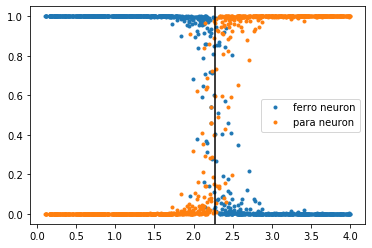

In [75]:
tc = 2/np.log(1+np.sqrt(2))
plt.plot(output_temp,ferro_neuron_output,'.',label='ferro neuron')
plt.plot(output_temp,para_neuron_output,'.',label='para neuron')
ax = plt.gca()
ax.axvline(tc,c='k')
plt.legend()
plt.show()